In [1]:
from control import *
import numpy as np
import matplotlib.pyplot as plt

In [147]:
# kp, ki, kd
# 0.9775171065493646, 0.9775171065493646, 999.0224828934506
# 4.887585532746823, 275.65982404692085, 984.3597262952102
# 7.820136852394917, 85.04398826979472, 936.4613880742913
# 31.28054740957967, 44.965786901270775, 956.989247311828
# 8.79765395894428, 75.26881720430107, 947.2140762463343
kp = 2
ki = 2
kd = 2

In [148]:
num = [0.9387, 0.0006683]
den = [1, 0.6274, 0.0004594]
plant = tf(num, den)
pid = tf([kd,kp,ki], [1,0])

In [149]:
sys = feedback(pid, plant, sign=1)

In [150]:
#sysd = sys.sample(Ts=0.025, method='zoh', alpha=None)

In [151]:
sys


2 s^4 + 3.255 s^3 + 3.256 s^2 + 1.256 s + 0.0009188
---------------------------------------------------
    -0.8774 s^3 - 1.251 s^2 - 1.878 s - 0.001337

In [152]:
time = np.arange(0,90)

In [153]:
sys1 = feedback(pid*plant, 1)
sys1d = sys1.sample(Ts=0.025, method='zoh', alpha=None)
sys1d


0.6525 z^3 - 1.941 z^2 + 1.925 z - 0.6364
-----------------------------------------
    z^3 - 2.978 z^2 + 2.957 z - 0.9785

dt = 0.025

In [158]:
len(s)

90

<function matplotlib.pyplot.show>

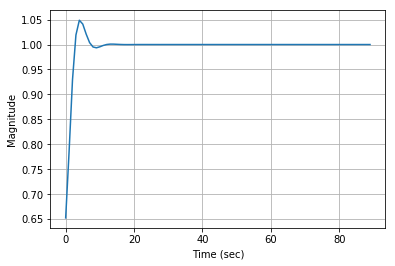

In [159]:
# PID compensated Step Response
t, s = step_response(sys1,T=time)
target = np.linspace(1, 1, num=len(t))
plt.figure()
#plt.plot(t,s,t,target)
plt.plot(t,s)
#plt.ylim([0,1.5])
plt.ylabel(r'Magnitude')
plt.xlabel(r'Time (sec)')
plt.grid()
plt.show

In [45]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)

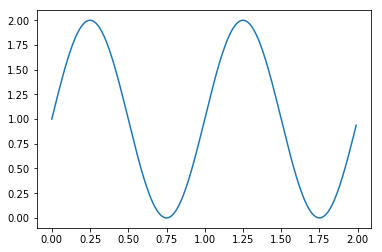

In [46]:
plt.plot(t, s)

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from control import *

In [160]:
# Plant
num = [1]
den = [64,9.6,0.48,0.008]
G = tf(num, den)

# Plant Step Response
t, s = step_response(G)

#PID Controller
kp = 0.0361 
ki = 0.000731
kd = 0.6999

pid_num = [kd, kp, ki]
pid_den = [1, 0]
C = tf(pid_num,pid_den)

# System
T = feedback(C*G,1)

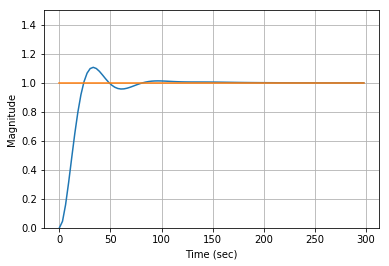

In [161]:
# PID compensated Step Response
t, s = step_response(T)
target = np.linspace(1, 1, num=len(t))
plt.figure()
plt.plot(t,s,t,target)
#plt.plot(t,s)
plt.ylim([0,1.5])
plt.ylabel(r'Magnitude')
plt.xlabel(r'Time (sec)')
plt.grid()
plt.show

error = target - s

In [118]:
import matplotlib
import numpy
from control import *
import math

In [119]:
from deap import base, creator
# Crear clase FITNESS: ( Nombre de la clase, Delegando la clase como fitness, Posibles valores min y max del fitness )
creator.create("ControllerFitness", base.Fitness, weights=(-1.0,)) # ES 1 POSITIVO PORQUE SE BUSCA MAXXIMIZAR, Y PARA ENTENDER ESTO VERIFICAR LO QUE RETORNA LA FUNCIÓN QUE EVALUA EL PID!!!

# Crear clase CROMOSOMA: ( Nombre de la clase, type de los valores de la clase, Establecer fitness con la clase anterior )
creator.create("Controller", list, fitness=creator.ControllerFitness)

/usr/local/lib/python3.5/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ControllerFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Controller' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [120]:
import random
from deap import tools

IND_SIZE = 33 # ki bits + kp bits + kd bits

# Functions to initialize populations from individuals

toolbox = base.Toolbox()

# Crear el ATRIBUTO de cromosomas ( Nombre del registro para el toolbox, Función para crear un cromosoma aleatorio )
toolbox.register("bit_attribute", random.randint, 0, 1) # random.choice, '10')

# Crear el CROMOSOMA ( Nombre del registro, , La clase cromosoma, La clase atributo, Tamaño de la población )
# Cuando se llame a toolbox.individual(), este llamará a tool.initRepeat()
toolbox.register("controller", tools.initRepeat, creator.Controller, toolbox.bit_attribute, n=IND_SIZE)

# Crear la POBLACIÓN ( Nombre del registro, , Type del cromosoma, El cromosoma )
toolbox.register("population", tools.initRepeat, list, toolbox.controller)

In [121]:
ind = toolbox.controller()

In [169]:
def evaluate(controller):
    controller = ''.join(map(str,controller))
    
    # PID controller
    _kp = int(controller[0:11],2)
    _ki = int(controller[11:22],2)
    _kd = int(controller[22:33],2)
    
    kp = 0 + _kp * ( (2 - 0) / (math.pow(2,11) - 1) )
    ki = 0 + _ki * ( (2 - 0) / (math.pow(2,11) - 1) )
    kd = 0 + _kd * ( (2 - 0) / (math.pow(2,11) - 1) )
    
    # Plant
    num1 = [1]
    den1 = [64,9.6,0.48,0.008]
    num = [0.9387, 0.0006683]
    den = [1, 0.6274, 0.0004594]
    plant = tf(num, den)
    
    pid_num = [kd, kp, ki]
    pid_den = [1, 0]
    pid = tf(pid_num,pid_den)

    # System
    sys = feedback(pid*plant,1)
    
    # PID compensated Step Response
    time = np.arange(0,1000)
    t, s = step_response(sys,T=time)
    l = len(t)
    
    total_error = sum(abs(1 - s))
    
    #total_error = sum(map(lambda x:abs(1-x)/l,s))
    
    '''
    total_error = 0
    while (1-s[total_error-1]) < 0.01:
        total_error = total_error + 1
    '''
    
    print(total_error)
    
    return (total_error),

In [170]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

In [171]:
ind = toolbox.controller()

In [172]:
def main():
    pop = toolbox.population(n=40)
    # pop[0:100] = prev
    CXPB, MUTPB, NGEN = 0.7, 0.1, 60

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    minFit = (1,)
    #while minFit > (0.02,):
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_ind))
        minFit = min(fitnesses)
        print("=START=================================================================")
        print(fitnesses)
        print("=END===================================================================")
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # The population is entirely replaced by the offspring
        pop[:] = offspring
    
    
    return pop

In [166]:
w = [1,2,3,4]
w[len(w)-1]

4

In [167]:
kx = main();

5.088834989928118e+93
2.688085271868031e+56
4.8602867180951144e+75
2.594379692945617e+84
5.025004037109281e+54
3.2479009265970254e+110
8.449845180065878e+79
4.6889904222843066e+67
1.8376218610263093e+61
1.409159229949827e+28
2.7420793455205954e+87
3.89244661027616e+98
4.684378752163045e+86
1.110058646393873e+56
5.110920769432184e+104
6.889764372201895e+71
6.520144876629457e+55
5.258457308514897e+111
3.9320822790905126e+55
3.564471624076141e+89
6.332409560812594e+54
3.15095436697932e+79
6.1935945304607705e+53
7.854763355166819e+85
6.699990575270389e+98
1.969509267160408e+99
1.7503376558652963e+70
1.1917951311783618e+105
1.741337993195264e+88
6.34784752130476e+77
4.983543999327664e+78
1.2682540862841748e+89
3.464694409954106e+105
3.56562152001536e+99
1.310145282856815e+69
2.3673975664698973e+87
4.322357269808602e+102
7.164508184810167e+92
1.200398344655371e+102
1.3059266035717771e+69
4.677328985395498e+54
3.20171811118457e+60
3.4339037472014235e+55
1.7503376558652963e+70
1.75033765586529

1.0785813869512095e+28
5.47372857599769e+22
433144958.68236583
1.3097052761408066e+27
9.778644192412685e+27
10938862.330540692
4.88284480482541e+39
300787102.9206137
2.7175080209785523e+28
2.0314039480510064e+26
1.3333465571433063e+24
1.6160572991960072e+22
1.2490500827039098e+27
1.5717754142155618e+23
5846329089385.554
2.1253960794412362e+22
1.127527003149745e+28
1.5569923690312797e+27
7361505.128141003
453068183.90170914
1017659722.3167613
1.5569923690312797e+27
26238454.936915748
=START=================================================================
[(1.3114223673628576e+27,), (1.0785813869512095e+28,), (5.47372857599769e+22,), (433144958.68236583,), (1.3097052761408066e+27,), (9.778644192412685e+27,), (10938862.330540692,), (4.88284480482541e+39,), (300787102.9206137,), (2.7175080209785523e+28,), (2.0314039480510064e+26,), (1.3333465571433063e+24,), (1.6160572991960072e+22,), (1.2490500827039098e+27,), (1.5717754142155618e+23,), (5846329089385.554,), (2.1253960794412362e+22,), (1.

218114.39165012346
218114.39165012346
7035504.745200419
7361505.128141003
208667.0062251872
7035504.745200419
=START=================================================================
[(7035504.745200419,), (7035504.745200419,), (7361505.128141003,), (7361505.128141003,), (7035504.745200419,), (7035504.745200419,), (7361505.128141003,), (189137989.18100908,), (218114.39165012346,), (3504870.5467194384,), (419717.70818340837,), (3504870.5467194384,), (7035504.745200419,), (7035504.745200419,), (7361505.128141003,), (87.74758300528765,), (87.74758300528765,), (16308820.953358077,), (7035504.745200419,), (87.74758300528765,), (457442.78521077917,), (218114.39165012346,), (862582270565224.4,), (7361505.128141003,), (421.5888906600063,), (50.131850234772386,), (7195839.716003347,), (7361505.128141003,), (7035504.745200419,), (7035504.745200419,), (7361505.128141003,), (218114.39165012346,), (218114.39165012346,), (7035504.745200419,), (7361505.128141003,), (208667.0062251872,), (7035504.74520

28.9296863140449
28.9296863140449
29.189489601921956
27.846037190529767
2.8314452023339897e+52
26.299484703132734
27.846037190529767
28.9296863140449
29.189489601921956
29.189489601921956
29.189489601921956
29.189489601921956
7.824018447294888e+37
29.189489601921956
28.087314666749325
28.087314666749325
28.087314666749325
28.087314666749325
28.087314666749325
28.087314666749325
28.087314666749325
28.087314666749325
28.087314666749325
29.189489601921956
29.189489601921956
28.087314666749325
28.087314666749325
28.087314666749325
=START=================================================================
[(21.978878052714535,), (28.9296863140449,), (28.9296863140449,), (29.189489601921956,), (27.846037190529767,), (2.8314452023339897e+52,), (26.299484703132734,), (27.846037190529767,), (28.9296863140449,), (29.189489601921956,), (29.189489601921956,), (29.189489601921956,), (29.189489601921956,), (7.824018447294888e+37,), (29.189489601921956,), (28.087314666749325,), (28.087314666749325,), (2

24.30487063676459
1.0413630691560176e+51
18.30165921264965
18.30165921264965
27.879071274391688
18.149774369051098
18.149774369051098
18.30165921264965
21.978878052714535
18.095666168734347
18.30165921264965
19.09896870630805
2.1968633905519846e+38
8.556522799409172e+26
129.60635928466186
18.149774369051098
18.39277830844449
2.435003154531122e+68
21.459038614329742
18.149774369051098
21.459038614329742
18.30165921264965
=START=================================================================
[(21.978878052714535,), (18.30165921264965,), (21.459038614329742,), (21.978878052714535,), (18.30165921264965,), (21.459038614329742,), (18.30165921264965,), (21.978878052714535,), (18.149774369051098,), (21.459038614329742,), (19.66488762772985,), (24.30487063676459,), (1.0413630691560176e+51,), (18.30165921264965,), (18.30165921264965,), (27.879071274391688,), (18.149774369051098,), (18.149774369051098,), (18.30165921264965,), (21.978878052714535,), (18.095666168734347,), (18.30165921264965,), (1

14.709374762576498
14.581502968140388
8.87612375764628e+72
14.709374762576498
14.709374762576498
14.709374762576498
14.709374762576498
14.709374762576498
=START=================================================================
[(19.489992872795607,), (14.709374762576498,), (14.709374762576498,), (14.709374762576498,), (14.709374762576498,), (14.709374762576498,), (18.095666168734347,), (14.709374762576498,), (14.709374762576498,), (14.64420437826971,), (35.19685592967299,), (14.709374762576498,), (14.709374762576498,), (14.64420437826971,), (14.709374762576498,), (14.709374762576498,), (14.64420437826971,), (14.581502968140388,), (14.709374762576498,), (14.709374762576498,), (17.990572702453495,), (14.709374762576498,), (14.709374762576498,), (14.709374762576498,), (14.581502968140388,), (8.87612375764628e+72,), (14.709374762576498,), (14.709374762576498,), (14.709374762576498,), (14.709374762576498,), (14.709374762576498,)]
=END==========================================================

13.702363960001591
13.591423428610005
14.199907719225635
14.199907719225635
13.591423428610005
=START=================================================================
[(13.702363960001591,), (13.702363960001591,), (13.702363960001591,), (13.591423428610005,), (13.691180708211544,), (13.909561875412622,), (13.702363960001591,), (13.591423428610005,), (13.702363960001591,), (13.591423428610005,), (13.651953328126325,), (14.290834741527913,), (13.702363960001591,), (13.702363960001591,), (13.702363960001591,), (13.702363960001591,), (13.702363960001591,), (13.591423428610005,), (13.702363960001591,), (13.702363960001591,), (13.702363960001591,), (13.702363960001591,), (13.702363960001591,), (13.702363960001591,), (13.702363960001591,), (13.702363960001591,), (8.081846373855817e+52,), (51132757613682.98,), (13.702363960001591,), (13.591423428610005,), (14.199907719225635,), (14.199907719225635,), (13.591423428610005,)]
=END===================================================================

13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
=START=================================================================
[(13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (1.2863641012806707e+37,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591

13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
18.625028225966986
13.591423428610005
17.579368470439373
381.6821082509573
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
13.591423428610005
42.25818422612115
1.4397611875006784e+22
=START=================================================================
[(13.591423428610005,), (19.957360700654615,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (13.591423428610005,), (18.625028225966986,), (13.591423428610005,), (17.579368470439373,), (381.6821082509573,), (13.59142342861000

13.591423428610005
13.591099881208722
13.591423428610005
13.591099881208722
13.591099881208722
13.591099881208722
13.591099881208722
13.591099881208722
13.591423428610005
13.591423428610005
13.591099881208722
13.591423428610005
13.591099881208722
=START=================================================================
[(13.591423428610005,), (13.591423428610005,), (13.591099881208722,), (13.591099881208722,), (13.591099881208722,), (13.591099881208722,), (13.591099881208722,), (13.591099881208722,), (13.591099881208722,), (13.591423428610005,), (13.591099881208722,), (13.591423428610005,), (13.591099881208722,), (13.591099881208722,), (13.591099881208722,), (13.591099881208722,), (13.591099881208722,), (13.591423428610005,), (13.591423428610005,), (13.591099881208722,), (13.591423428610005,), (13.591099881208722,)]
=END===================================================================
13.591099881208722
13.591099881208722
13.591099881208722
13.591099881208722
13.591099881208722
13.5910

In [168]:
for bits in kx:
    controller = ''.join(map(str,bits))
    
    # PID controller
    _kp = int(controller[0:11],2)
    _ki = int(controller[11:22],2)
    _kd = int(controller[22:33],2)
    
    kp = 0 + _kp * ( (2 - 0) / (pow(2,11) - 1) )
    ki = 0 + _ki * ( (2 - 0) / (pow(2,11) - 1) )
    kd = 0 + _kd * ( (2 - 0) / (pow(2,11) - 1) )
    
    print([_kp,_ki,_kd,kp,ki,kd])

[59, 1, 1535, 0.05764533463605276, 0.0009770395701025891, 1.4997557401074744]
[59, 1, 1531, 0.05764533463605276, 0.0009770395701025891, 1.495847581827064]
[571, 512, 1531, 0.5578895945285784, 0.5002442598925256, 1.495847581827064]
[59, 1, 1535, 0.05764533463605276, 0.0009770395701025891, 1.4997557401074744]
[59, 1, 1535, 0.05764533463605276, 0.0009770395701025891, 1.4997557401074744]
[59, 1, 1531, 0.05764533463605276, 0.0009770395701025891, 1.495847581827064]
[59, 1, 1531, 0.05764533463605276, 0.0009770395701025891, 1.495847581827064]
[59, 1, 1531, 0.05764533463605276, 0.0009770395701025891, 1.495847581827064]
[59, 1, 1531, 0.05764533463605276, 0.0009770395701025891, 1.495847581827064]
[59, 1, 1531, 0.05764533463605276, 0.0009770395701025891, 1.495847581827064]
[59, 1, 1535, 0.05764533463605276, 0.0009770395701025891, 1.4997557401074744]
[59, 1, 1531, 0.05764533463605276, 0.0009770395701025891, 1.495847581827064]
[59, 1, 1531, 0.05764533463605276, 0.0009770395701025891, 1.4958475818270

In [145]:
evaluate(kx[1])

0.7912490179501093


(0.7912490179501093,)

In [146]:
controller = ''.join(map(str,kx[1]))
    
# PID controller
_kp = int(controller[0:10],2)
_ki = int(controller[10:20],2)
_kd = int(controller[20:30],2)

kp = 0 + _kp * ( (1000 - 0) / (pow(2,10) - 1) )
ki = 0 + _ki * ( (1000 - 0) / (pow(2,10) - 1) )
kd = 0 + _kd * ( (1000 - 0) / (pow(2,10) - 1) )
    
print([_kp,_ki,_kd,kp,ki,kd])

[1023, 1023, 1023, 1000.0, 1000.0, 1000.0]


In [ ]:
import matplotlib
import numpy
from control import *
import math
from deap import base, creator

In [ ]:
# Crear clase FITNESS: ( Nombre de la clase, Delegando la clase como fitness, Posibles valores min y max del fitness )
creator.create("ControllerFitness", base.Fitness, weights=(-1.0,))

# Crear clase CROMOSOMA: ( Nombre de la clase, type de los valores de la clase, Establecer fitness con la clase anterior )
creator.create("Controller", list, fitness=creator.ControllerFitness)

In [ ]:
import random
from deap import tools

IND_SIZE = 30 # ki bits + kp bits + kd bits

# Functions to initialize populations from individuals

toolbox = base.Toolbox()

# Crear el ATRIBUTO de cromosomas ( Nombre del registro para el toolbox, Función para crear un cromosoma aleatorio )
toolbox.register("bit_attribute", random.randint, 0, 1) # random.choice, '10')

# Crear el CROMOSOMA ( Nombre del registro, , La clase cromosoma, La clase atributo, Tamaño de la población )
# Cuando se llame a toolbox.individual(), este llamará a tool.initRepeat()
toolbox.register("controller", tools.initRepeat, creator.Controller, toolbox.bit_attribute, n=IND_SIZE)

# Crear la POBLACIÓN ( Nombre del registro, , Type del cromosoma, El cromosoma )
toolbox.register("population", tools.initRepeat, list, toolbox.controller)

In [ ]:
ind = toolbox.controller()

In [ ]:
def evaluatePID(kp, ki, kd):
    error = 0
    
    pid1 = 0
    error0 = 0
    error1 = 0
    error2 = 0

    for k in np.arange(20):
    #while error < 9000000
        d, pid1, error1, error2  = pidController(kp, ki, kd, 0.025, k, pid1, error0, error1, error2)
        y = model.predict(pd.DataFrame(data=d))
        error0 = 1 - y
        error = error + error0
        if (error > 1000000):
            error = 1000000
        #print([d, pid1, error1, error2 ])
        print(d)
    
    return error

In [ ]:
def evaluate(controller):
    controller = ''.join(map(str,controller))
    
    # PID controller
    _kp = int(controller[0:10],2)
    _ki = int(controller[10:20],2)
    _kd = int(controller[20:30],2)
    
    kp = 0 + _kp * ( (1000 - 0) / (math.pow(2,10) - 1) )
    ki = 0 + _ki * ( (1000 - 0) / (math.pow(2,10) - 1) )
    kd = 0 + _kd * ( (1000 - 0) / (math.pow(2,10) - 1) )
    
    total_error = evaluatePID(kp, ki, kd)
    
    return (total_error),

In [ ]:
ind = toolbox.controller()

In [ ]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

In [ ]:
def main():
    pop = toolbox.population(n=40)
    # pop[0:100] = prev
    CXPB, MUTPB, NGEN = 0.7, 0.1, 40

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    minFit = (1,)
    #while minFit > (0.02,):
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_ind))
        minFit = min(fitnesses)
        print("=START=================================================================")
        print(fitnesses)
        print("=END===================================================================")
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # The population is entirely replaced by the offspring
        pop[:] = offspring
    
    
    return pop

In [ ]:
q = main()

In [ ]:
for bits in q:
    controller = ''.join(map(str,bits))
    
    # PID controller
    _kp = int(controller[0:10],2)
    _ki = int(controller[10:20],2)
    _kd = int(controller[20:30],2)
    
    kp = 0 + _kp * ( (1000 - 0) / (pow(2,10) - 1) )
    ki = 0 + _ki * ( (1000 - 0) / (pow(2,10) - 1) )
    kd = 0 + _kd * ( (1000 - 0) / (pow(2,10) - 1) )
    
    print([_kp,_ki,_kd,kp,ki,kd])